## Abhängigkeit der Popularität eines Titels von seiner Lautstärke

### Auswahl und Statistik

In diesem Projekt werde ich die Popularität eines Titels **(`track_popularity`)** anhand seiner Lautstärke **(`loudness`)** vorhersagen.
Als erstes werde ich die notwendigen Bibliotheken und Daten laden:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Laden von Daten
spotify_data = pd.read_excel('spotify.xlsx')

# Anzeigen der ersten Zeilen
spotify_data.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


Als nächstes werde ich die ausgewählten Felder analysieren

In [16]:
# Statistiken für Lautstärke und Popularität
loudness_stats = spotify_data['loudness'].describe()
popularity_stats = spotify_data['track_popularity'].describe()

print("Statistiken zur Lautstärke:")
print(loudness_stats)
print("\nStatistiken über die Popularität:")
print(popularity_stats)

# Berechnung von Median und Standardabweichung
loudness_median = spotify_data['loudness'].median()
loudness_std = spotify_data['loudness'].std()
popularity_median = spotify_data['track_popularity'].median()
popularity_std = spotify_data['track_popularity'].std()

print("\nMediane Lautstärke:", loudness_median)
print("Standardabweichung der Lautstärke:", loudness_std)
print("Median der Popularität:", popularity_median)
print("Standardabweichung der Popularität:", popularity_std)

Statistiken zur Lautstärke:
count    1686.000000
mean       -6.704131
std         3.377068
min       -43.643000
25%        -7.950250
50%        -5.974500
75%        -4.687250
max         1.295000
Name: loudness, dtype: float64

Statistiken über die Popularität:
count    1686.000000
mean       75.806050
std         6.032532
min        68.000000
25%        71.000000
50%        75.000000
75%        79.000000
max       100.000000
Name: track_popularity, dtype: float64

Mediane Lautstärke: -5.9745
Standardabweichung der Lautstärke: 3.3770684402111675
Median der Popularität: 75.0
Standardabweichung der Popularität: 6.032531899852568


### Visualisierung

Ich werde nun Histogramme für beide Felder erstellen:

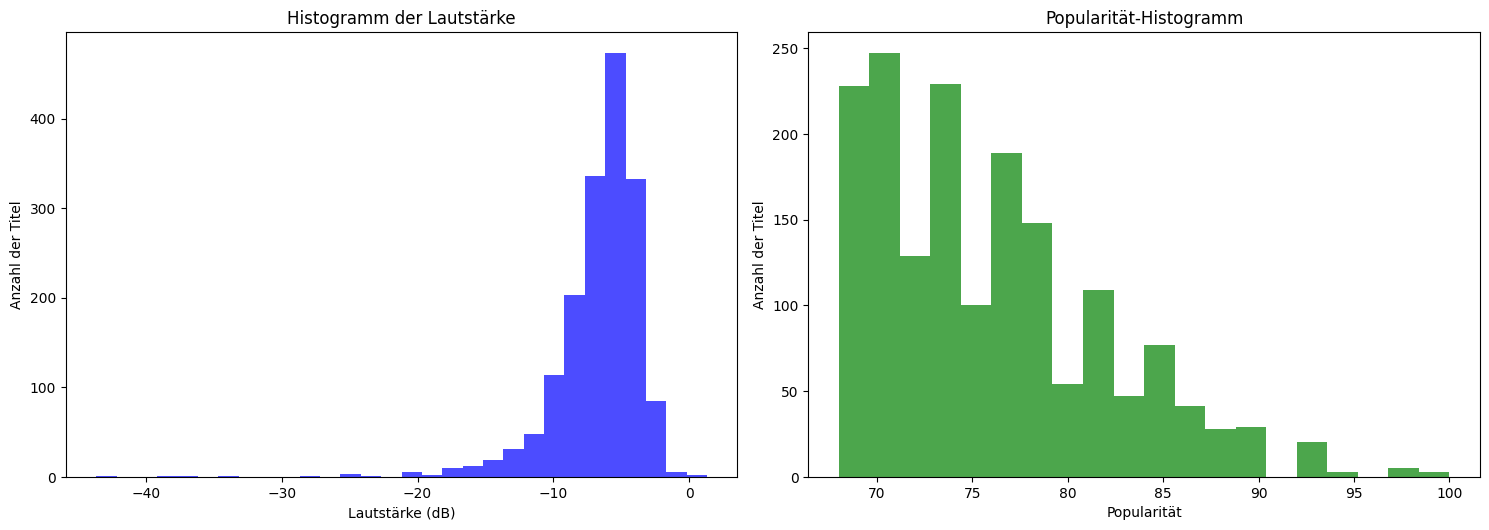

In [17]:
# Anpassen der Grösse der Diagramme
plt.figure(figsize=(15, 10))

# Histogramm der Lautstärke
plt.subplot(2, 2, 1)
plt.hist(spotify_data['loudness'], bins=30, color='blue', alpha=0.7)
plt.title('Histogramm der Lautstärke')
plt.xlabel('Lautstärke (dB)')
plt.ylabel('Anzahl der Titel')

# Popularität-Histogramm
plt.subplot(2, 2, 2)
plt.hist(spotify_data['track_popularity'], bins=20, color='green', alpha=0.7)
plt.title('Popularität-Histogramm')
plt.xlabel('Popularität')
plt.ylabel('Anzahl der Titel')

plt.tight_layout()
plt.show()

### Skalierung

Zum Schluss werde ich die Daten skalieren, um sie in den gleichen Bereich zu bringen:

In [18]:
# Daten in einen Bereich von 0 bis 1 umwandeln

# Für Lautstärke
loudness_min = spotify_data['loudness'].min()
loudness_max = spotify_data['loudness'].max()
loudness_scaled = (spotify_data['loudness'] - loudness_min) / (loudness_max - loudness_min)

# Für Popularität
popularity_min = spotify_data['track_popularity'].min()
popularity_max = spotify_data['track_popularity'].max()
popularity_scaled = (spotify_data['track_popularity'] - popularity_min) / (popularity_max - popularity_min)

# Skalierte Datenstatistiken
print("Skalierte Datenstatistiken:")
print("Lautstärke (skaliert):")
print(f"Minimum: {min(loudness_scaled)}")
print(f"Maximum: {max(loudness_scaled)}")
print(f"Durchschnitt: {sum(loudness_scaled) / len(loudness_scaled)}")

print("\nPopularität (skaliert):")
print(f"Minimum: {min(popularity_scaled)}")
print(f"Maximum: {max(popularity_scaled)}")
print(f"Durchschnitt: {sum(popularity_scaled) / len(popularity_scaled)}")

Skalierte Datenstatistiken:
Lautstärke (skaliert):
Minimum: 0.0
Maximum: 1.0
Durchschnitt: 0.8219962820001322

Popularität (skaliert):
Minimum: 0.0
Maximum: 1.0
Durchschnitt: 0.24393905693950177


### Schlussforderung

In diesem Fall ist die Skalierung der Daten nützlich, da Lautheit und Beliebtheit auf unterschiedlichen Skalen gemessen werden (Lautheit in Dezibel von -40 bis 0 und Beliebtheit in einem Bereich von 0 bis 100). Die Konvertierung in einen gemeinsamen Bereich von 0 bis 1 ermöglicht uns einen einfachen Vergleich. Der Korrelationskoeffizient zwischen Lautheit und Popularität ist gering (etwa 0,08), d. h. es besteht nur eine schwache Korrelation zwischen diesen Parametern, d. h. die Lautheit eines Titels ist kaum ein Bestimmungsfaktor für seine Popularität.